# K-D Tree Example

K-D Trees are useful for efficiently finding nearest neighbour points in n-dimensional space.

Documentation on `scipy.spatial.KDTree` is [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html).

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial

%matplotlib inline

In [133]:
# Create some points in 2-dimensions
data = [{'x': -50, 'y': 30}, 
        {'x': 70, 'y': -68},
        {'x': 10, 'y': 50}]
coords = pd.DataFrame(data)
coords

,x,y
0,-50,30
1,70,-68
2,10,50


In [139]:
# Build k-d tree
tree = spatial.KDTree(coords)

# Find the nearest neighbour to one point
one_pt = (0, 0)
distance, pt_id = tree.query(one_pt)
pt_id, distance

(2, 50.99019513592785)

In [136]:
# Find the nearest neighbour to a series of points
some_pts = [(x, x) for x in range(-100, 101, 25)]
neighb_distances, neighb_ids = tree.query(some_pts, k=1)
list(zip(neighb_ids, neighb_distances))

[(0, 139.2838827718412),
 (0, 107.93516572461452),
 (0, 80.0),
 (0, 60.41522986797286),
 (2, 50.99019513592785),
 (2, 29.154759474226502),
 (2, 40.0),
 (2, 69.6419413859206),
 (2, 102.95630140987001)]

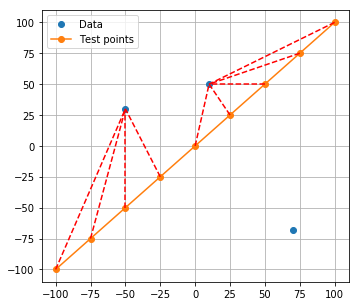

In [137]:
# Visualize the results
plt.figure(figsize=(5.5, 5))

# Data points
plt.plot(coords['x'], coords['y'], 'o', label='Data')

# Test points
x = [p[0] for p in some_pts]
y = [p[1] for p in some_pts]
plt.plot(x, y, '-o', label='Test points')

# Add lines to nearest neighbours
for pt, neighb in zip(some_pts, neighb_ids):
    
    neighb_pt = (coords.loc[neighb, 'x'], coords.loc[neighb, 'y'])
    x = [pt[0], coords.loc[neighb, 'x']]
    y = [pt[1], coords.loc[neighb, 'y']]
    plt.plot(x, y, "r--")

plt.grid()
plt.legend()
plt.show()